
# <span style="background-color: gold;">DS_Project_KrasnobaevAA_MarchenkoMS_Group5</span> 



## Tasks
1. [2] Take any time series of monthly or quarterly periodicity with seasonal pattern. Clearly describe the source you use.
2. [10] Visualize the time series. Try to use different plot types. Split your time series into train and test parts.
3. [5] Decompose the time series into three components (trend, seasonal part, noise) and plot them. Here you may use ETS model or any other decomposition technique.
4. [10] Make forecasts using Random Forest or Gradient Boosting.Clearly describe the features you create. You may use any additional predictors.
5. [10] Make forecasts using appropriate model of ETS class.
6. [10 + 5 bonus for something extraordinary] Surprise me part! Make forecasts using any statistical model or machine learning algorithm of your choice. Try to be creative!
7. [3] Compare the three approaches by the forecast quality on the test set. Choose the best approach.
8. Add some fun to your project! :)


In [1]:
"""
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣤⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠻⠿⠿⠿⠀⠉⠛⠻⢷⠂⠻⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢀⣤⡶⠟⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠃⠺⣧⡀⠀⠀⠀⠀⠀⠀shhhh?...
⠀⠀⠀⢠⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣆⠀⠀⠀⠀⠀                                           
⠀⠀⣰⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣿⣿⣷⣀⣴⣾⣿⡄⠀⠀⠀⠀                     ShhHhhhH!!!...     .|||||||||.  
⠀⠰⠟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣿⡟⠉.⠙⢿⣿⣄⠀⠀⠀                                       |||||||||||||
⠀⠀⢸⣇⠀⠀⠀⢀⣀⣀⣀⣀⣀⣀⣀⣠⣤⣴⣿⣿⣿⣿⣶⣴⣿⣿⣿⣃⣀⠀                                    /. `|||||||||||
⠀⠀⠀⢿⣀⣴⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠟⠃⠀                                  o__,_|||||||||||''
⠀⠀⠀⠘⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
                                                            
                                                                         .|||||||||.
                                         ShhhhhHshshshhhhHH!!!...       |||||||||||||
                                                                       /. `|||||||||||
                                                                     o__,_|||||||||||''


"""
;

''

<b>Before writing the code, we have to install vital libraries to operate in the future.</b>

Here's the list of them:
* yfinance (!pip install yfinance --upgrade --quiet)
* pandas "dask[complete]" (!pip3 install --upgrade pandas "dask[complete]" --quiet)
* sktime (!pip install sktime --upgrade --quiet)
* orbit-ml (!pip install orbit-ml --upgrade --quiet)

In [2]:
!pip install yfinance --upgrade --quiet

In [3]:
!pip3 install pandas "dask[complete]" --upgrade --quiet

In [4]:
!pip install sktime --upgrade --quiet

In [5]:
!pip install orbit-ml --upgrade --quiet

## Task #1
[2] Take any time series of monthly or quarterly periodicity with seasonal pattern. Clearly describe the source you use.

Using Yahoo library, let's parse the price of Take-Two Interactive Software's share (TTWO) -
(https://finance.yahoo.com/quote/TTWO/) Inc. We took time series of monthly periodicity of TTWO, because this example seemed to us to be the closest to defining a seasonal pattern. We did not take primitive examples in the form of temperatures, the dynamics of passenger growth on flights, or ready-made libraries with ready-made seasonal data, since a real example with real traded shares seemed to us the most interesting and applicable in real life. It was not possible to achieve ideal seasonality, but we can clearly notice the dynamics of the price, in which the peak of prices often occurs few months before the end of the year, and dips occur at the beginning of the next year.

## Task #2
[10] Visualize the time series. Try to use different plot types. Split your time series into train and test parts.

In [6]:
# Import all the needed instruments from libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sktime.split import temporal_train_test_split
from sktime.utils.plotting import plot_series
;

/Users/artemartem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/artemartem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


''

In [7]:
import warnings
warnings.filterwarnings('ignore') #igonre useless warnings

# Using Yahoo library, let's parse the price of Take-Two Interactive Software's share (TTWO) in real time -
# (https://finance.yahoo.com/quote/TTWO/) Inc. With the time window of 8 years represented on the monthly basis

PriceActionsTTWO = yf.Ticker('TTWO')
start_date = '2017-12-11'
end_date = '2024-12-11'

df = PriceActionsTTWO.history(start = start_date,end = end_date)
dfm = df.resample('M').last()
df1 = dfm.drop(['Stock Splits', 'Dividends','Volume'], axis = 1)
df1.to_csv('TTWODATA.csv')

# After excluding unrelated columns such as 'Stock Splits', 'Dividends','Volume', we get the final dataframe using Pandas

df1

   

,Open,High,Low,Close
Date,,,,
2017-12-31 00:00:00-05:00,109.400002,110.220001,108.250000,109.779999
2018-01-31 00:00:00-05:00,120.989998,127.769997,120.989998,126.669998
2018-02-28 00:00:00-05:00,113.550003,114.169998,111.800003,111.870003
2018-03-31 00:00:00-04:00,98.089996,99.769997,95.919998,97.779999
2018-04-30 00:00:00-04:00,100.419998,100.629997,98.199997,99.709999
...,...,...,...,...
2024-08-31 00:00:00-04:00,161.059998,162.119995,160.429993,161.710007
2024-09-30 00:00:00-04:00,153.070007,154.850006,152.259995,153.710007
2024-10-31 00:00:00-04:00,162.750000,164.460007,161.279999,161.720001


In [8]:
# Now let's read the composed dataframe in order to avoid problems with indexes

df2 = pd.read_csv('TTWODATA.csv')
df2

,Date,Open,High,Low,Close
0,2017-12-31 00:00:00-05:00,109.400002,110.220001,108.250000,109.779999
1,2018-01-31 00:00:00-05:00,120.989998,127.769997,120.989998,126.669998
2,2018-02-28 00:00:00-05:00,113.550003,114.169998,111.800003,111.870003
3,2018-03-31 00:00:00-04:00,98.089996,99.769997,95.919998,97.779999
4,2018-04-30 00:00:00-04:00,100.419998,100.629997,98.199997,99.709999
...,...,...,...,...,...
80,2024-08-31 00:00:00-04:00,161.059998,162.119995,160.429993,161.710007
81,2024-09-30 00:00:00-04:00,153.070007,154.850006,152.259995,153.710007
82,2024-10-31 00:00:00-04:00,162.750000,164.460007,161.279999,161.720001
83,2024-11-30 00:00:00-05:00,186.210007,189.309998,186.210007,188.380005


In [9]:
# Then we delete time (e.g. hours and minutes: 00:00:00-05:00) from Date column due to its irrelevance

df2['Date'] = df2['Date'].apply(lambda x:x.replace('00:00:00-05:00', ''))
df2['Date'] = df2['Date'].apply(lambda x:x.replace('00:00:00-04:00', ''))
df2

,Date,Open,High,Low,Close
0,2017-12-31,109.400002,110.220001,108.250000,109.779999
1,2018-01-31,120.989998,127.769997,120.989998,126.669998
2,2018-02-28,113.550003,114.169998,111.800003,111.870003
3,2018-03-31,98.089996,99.769997,95.919998,97.779999
4,2018-04-30,100.419998,100.629997,98.199997,99.709999
...,...,...,...,...,...
80,2024-08-31,161.059998,162.119995,160.429993,161.710007
81,2024-09-30,153.070007,154.850006,152.259995,153.710007
82,2024-10-31,162.750000,164.460007,161.279999,161.720001
83,2024-11-30,186.210007,189.309998,186.210007,188.380005


In [10]:
# Finally, due to time series we decided to decompose the dataframe into two different dataframes dfy and dfx,
# containing data from Close and Date columns respectively

dfy = df2['Close'].apply(lambda x:float(x))
dfx = pd.to_datetime(df2['Date'])

# dfx = np.array(dfx1.to_numpy(), dtype='datetime64[D]')

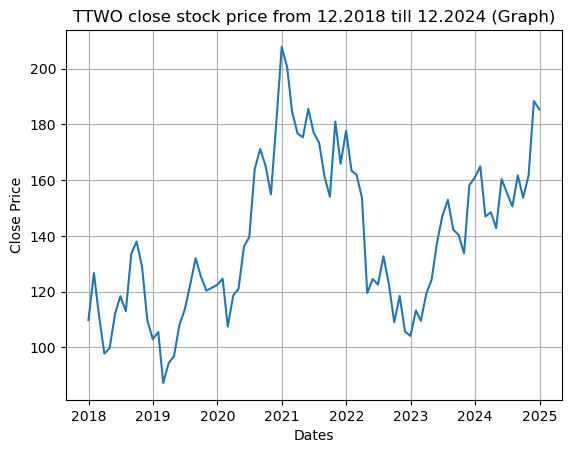

In [11]:
# Plotting the first type of graph for our time series

plt.plot(dfx, dfy)
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.title("TTWO close stock price from 12.2018 till 12.2024 (Graph)")

plt.grid()
plt.show()

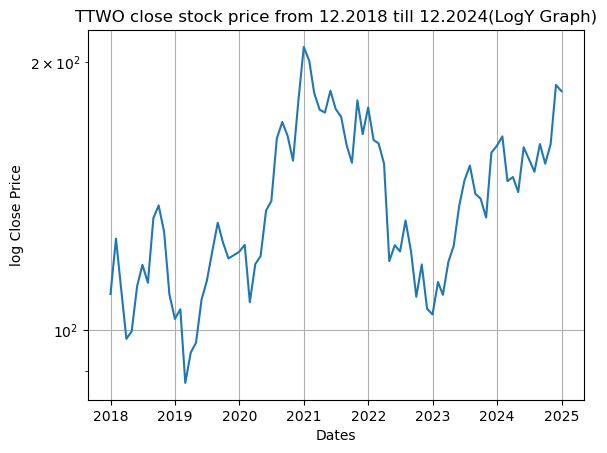

In [12]:
# The same goes for the semilog graph

plt.semilogy(dfx,dfy)
plt.xlabel("Dates")
plt.ylabel("log Close Price")
plt.title("TTWO close stock price from 12.2018 till 12.2024(LogY Graph)")

plt.grid()
plt.show()

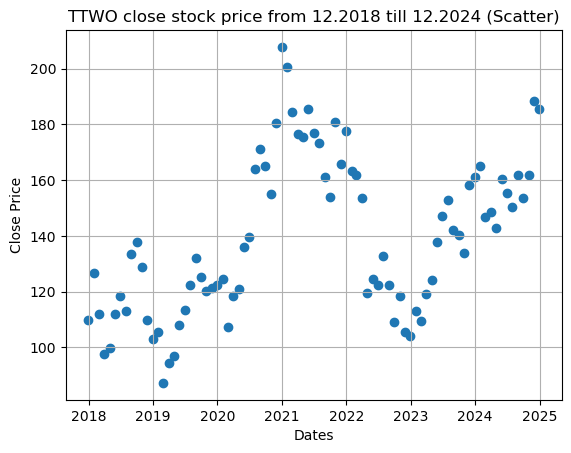

In [13]:
# Now we plot another type of graph in the form of the scatter diagram

plt.scatter(dfx, dfy)
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.title("TTWO close stock price from 12.2018 till 12.2024 (Scatter)")

plt.grid()
plt.show()

49 36


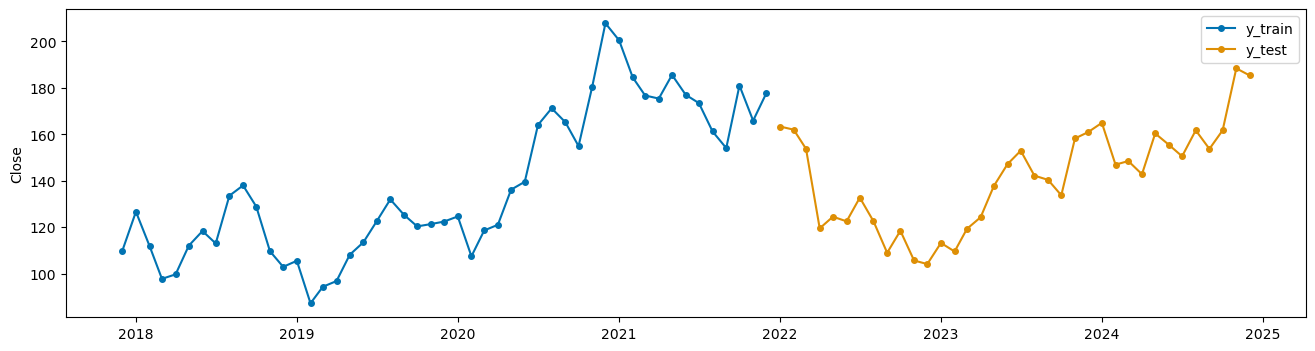

In [14]:
# Splitting time series into train and test parts, preparing the needed data before

df3 = df2.drop(columns = ['Open', 'High', 'Low'])
df3['Date'] = df3['Date'].apply(lambda x:x.replace('-30', ''))
df3['Date'] = df3['Date'].apply(lambda x:x.replace('-31', ''))
df3['Date'] = df3['Date'].apply(lambda x:x.replace('-28', ''))
df3['Date'] = df3['Date'].apply(lambda x:x.replace('-29', ''))
df3['Date'] = pd.to_datetime(df3['Date'])
df4 = df3.set_index('Date')
df4['Close'] = df4['Close'].apply(lambda x:float(x))

y_train, y_test = temporal_train_test_split(df4, test_size = 36)

# Plotting the result

plot_series(y_train, y_test, labels = ["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

## Task #3
[5] Decompose the time series into three components (trend, seasonal part, noise) and plot them. Here you may use ETS model or any other decomposition technique.

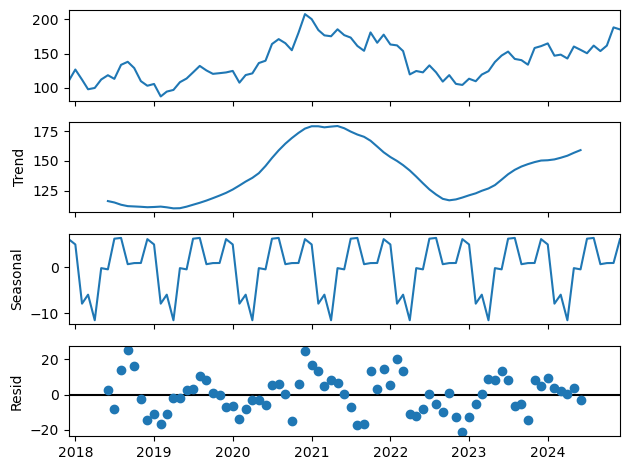

In [15]:
# In order to decompose the time series into three components (trend, seasonal part, noise) and plot them, we used
# statsmodels.tsa.seasonal library and our data

from statsmodels.tsa.seasonal import seasonal_decompose

series = df4
result = seasonal_decompose(series, model = 'additive')

# Here we got all possible visual decompositions in a convenient form

result.plot()
plt.show()


## Task #4
[10] Make forecasts using Random Forest or Gradient Boosting.Clearly describe the features you create. You may use any additional predictors

We've decided to choose Random Forest forecast because of its prevalence and attractiveness to us.
Firstly, we copied our previous dataframe so that in the future we don’t accidentally access an already created variable and change it. Secondly, we shifted one by one Close column 4 times, creating new columns with corresponding shift value. In order to delete all raws containing NaN, we used appropriate function to work with clearly transformed data. We then split time series into train and test parts in order to plot the result in the future. From sklearn we exported a special RandomForestRegressor function, filling with parameteres such as number of estimators and number of years to predict denominated in months. We then fitted our forecast from the fourth element due to the maximal value of shift being equal to 4. With exact time range and previously found values of X we build plot_series graph.

In [16]:
# Completing shifts to make a new dataset

X = df4.copy()
X['Shift1'] = df4.shift(1)
X['Shift2'] = df4.shift(2)
X['Shift3'] = df4.shift(3)
X['Shift4'] = df4.shift(4)

# Demolishing NaNs

X.drop(['Close'], axis = 1, inplace = True)
X.dropna(inplace = True)

# Splitting of X DataFrame into train and test parts

X_train, X_test = temporal_train_test_split(X, test_size = 36)

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='Close'>)

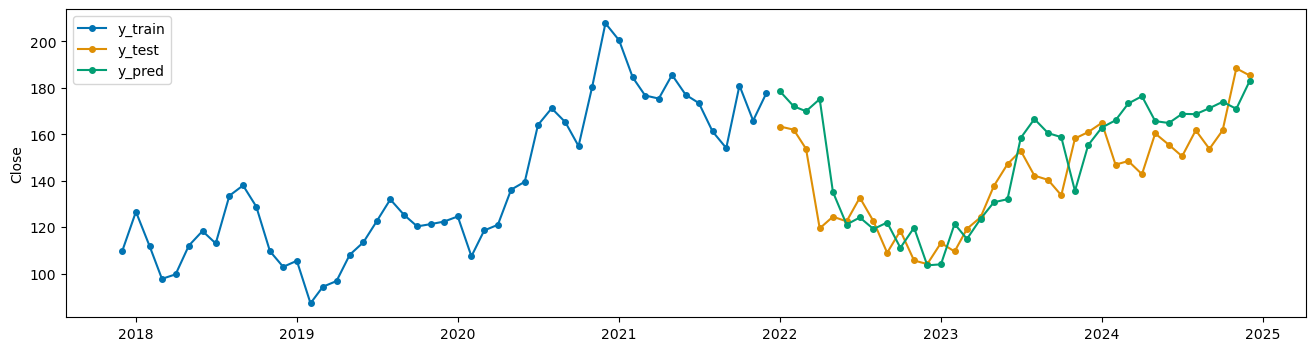

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the model

rf = RandomForestRegressor(n_estimators = 100, random_state = 36)
rf.fit(X_train, y_train[4:])

y_rf_pred = rf.predict(X_test)

# The model forecasts for the next 3 years from the end of the train part, 
# assuming that train part ended at 2021-12 (3 years ago from the month of writing this code)

index_rf = pd.PeriodIndex(pd.date_range("2022-01", periods = 36, freq = 'M'))
index_rf = index_rf.to_timestamp()
y_rf_pred = pd.Series(y_rf_pred)
y_rf_pred.index = index_rf

plot_series(y_train, y_test, y_rf_pred, labels = ['y_train','y_test', 'y_pred'])

## Task #5
[10] Make forecasts using appropriate model of ETS class.

(<Figure size 1600x400 with 1 Axes>, <AxesSubplot:ylabel='Close'>)

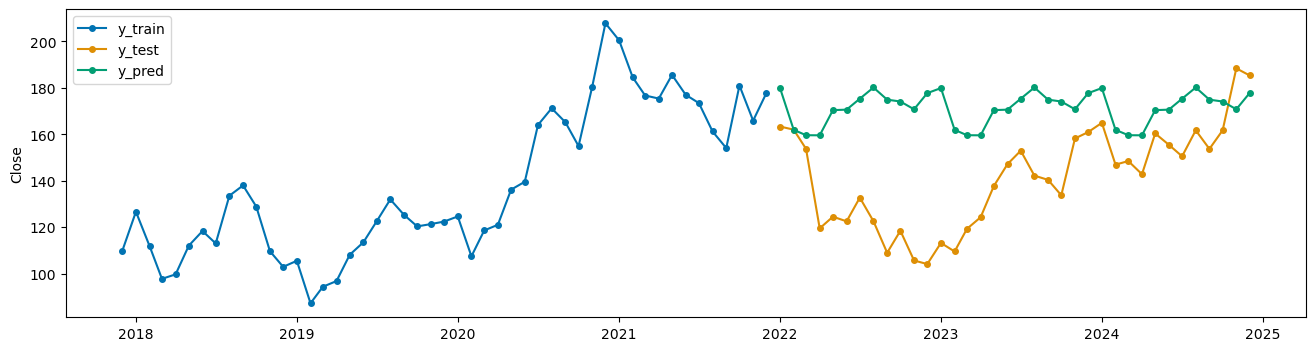

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
warnings.filterwarnings('ignore') #igonre useless warnings

# Using AutoETS with 36 months forecast

forcaster = ExponentialSmoothing(y_train, seasonal = 'add', seasonal_periods = 12).fit()
y_aets_pred = forcaster.forecast(steps = 36)

# Plotting the result

plot_series(y_train, y_test, y_aets_pred, labels = ["y_train", "y_test", "y_pred"])

## Task #6
[10 + 5 bonus for something extraordinary] Surprise me part! Make forecasts using any statistical model or machine learning algorithm of your choice. Try to be creative!

In this task to surprise you, we decided to use DLT model

In [19]:
# Here we adapt train part of our dataset to use it for DLT model

y_train2 = y_train.copy()

# Making a natural logrithm of every price because DLT model asks for that

y_train2['Close'] = y_train2['Close'].apply(lambda x:np.log(x)) 
y_train2 = y_train2.reset_index()
y_train2.rename(columns={'index': 'Date'}, inplace = True)
# y_train2

2024-12-31 13:59:16 - orbit - INFO - Optimizing (CmdStanPy) with algorithm: LBFGS.


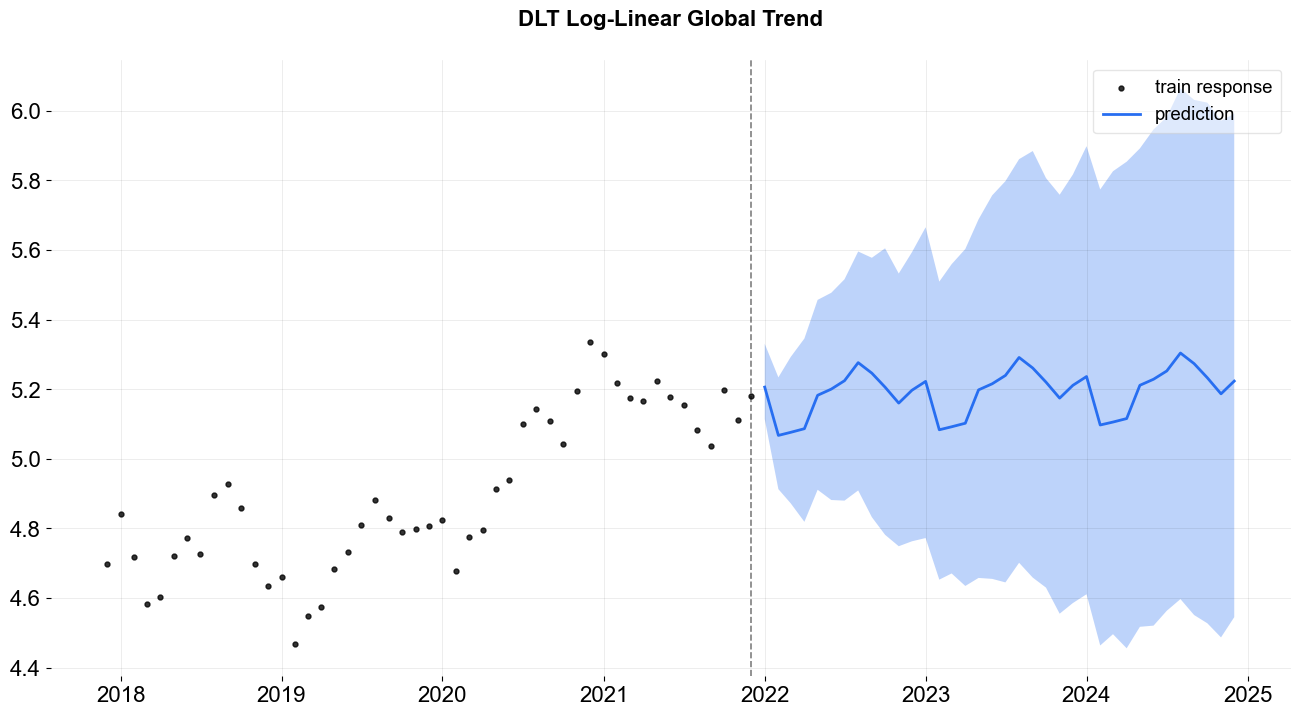

In [20]:
# Here we use orbit library, because it is the best option for making DLT model we have found

import orbit
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data
response_col = 'Close'
date_col = 'Date'

# Making DLT Log-Linear with MAP method

dlt = DLT(
    response_col = response_col,
    date_col = date_col,
    seasonality = 12,
    estimator = 'stan-map',
    seed = 8888,
    global_trend_option = 'loglinear',
    # for prediction uncertainty
    n_bootstrap_draws = 200,
)

dlt_fitted = dlt.fit(y_train2)

# Making test data, this method is easier than making y_test2 (the same algorithm as with y_train2), 
# but the result is the same

y_dlt_test = dlt_fitted.make_future_df(periods=12 * 3)
y_dlt_pred = dlt_fitted.predict(y_dlt_test) # prediction for 3 years
_ = plot_predicted_data(y_train2, y_dlt_pred, date_col, response_col,  title='DLT Log-Linear Global Trend')


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'DLT Log-Linear Global Trend'}, ylabel='Close'>)

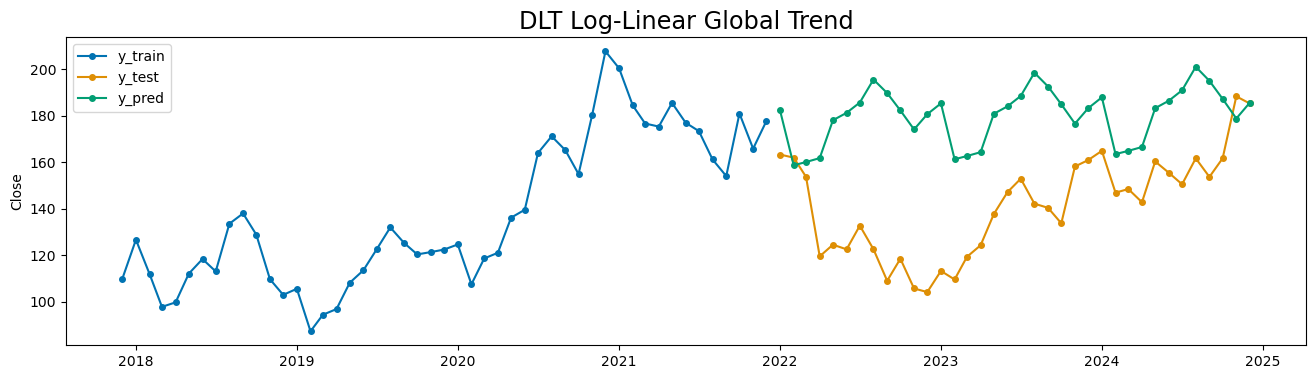

In [21]:
# The graph above is very beautiful, but it is hard to compare it with previous ones, so in this section we 
# transfer the data and make more common-looking graph with it

y_dlt_pred2 = y_dlt_pred.set_index('Date')
y_dlt_pred2['prediction'] = y_dlt_pred2['prediction'].apply(lambda x:np.exp(x))
plot_series(y_train, y_test, y_dlt_pred2['prediction'], labels = ['y_train', 'y_test', 'y_pred'], title = 'DLT Log-Linear Global Trend')

## Task #7
[3] Compare the three approaches by the forecast quality on the test set. Choose the best approach.

<b>Obtaining final calculations, we can make a conclusion that Random Forest, having the least RMSE for its estimator, will be the best model for forecasting in our case. At the same time, DLT Log-Linear model and AutoETS, having closely the same highest RMSE, will be the worst choice to predict future values within the framework of our tasks.</b>

In [22]:
# Finally, we're ready to compare statistically all three methods: Random Forest, AutoETS and DLT Log-Linear

from sklearn.metrics import mean_squared_error

# Let's compare RMSE (hypothetical loss function, reflecting trade off between efficiency and bias) 
# of estimators from different models 

rms_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred)) # square root of MSE for Random Forest
rms_aets = np.sqrt(mean_squared_error(y_test, y_aets_pred)) # square root of MSE for AutoETS
rms_dlt = np.sqrt(mean_squared_error(y_test, y_dlt_pred2['prediction'])) # square root of MSE for DLT Log-Linear

print(f'RMSE for Random Forest: {rms_rf}, for AutoETS: {rms_aets}, for DLT Log-Linear: {rms_dlt}')

RMSE for Random Forest: 17.00014026071502, for AutoETS: 36.715952158340414, for DLT Log-Linear: 44.669093182248915


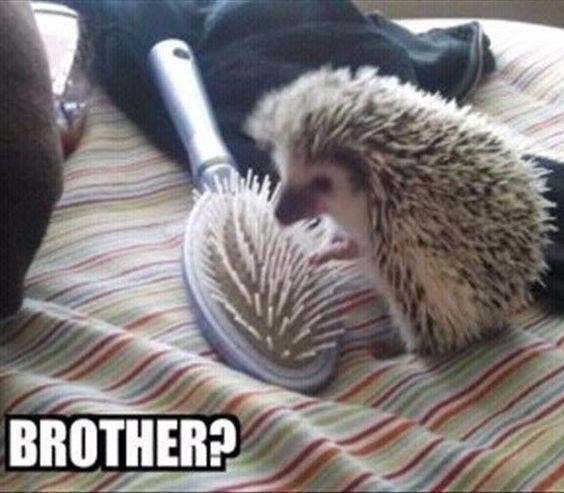